In [6]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='BPTI_500ns_0.8')
settings.replicates = 5
settings.gamma_range = (2,10)
settings.train_frac = 0.8
settings.RW_exponent = -4
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name BPTI_500ns_0.8 already exists. Attempting to change name to BPTI_500ns_0.80
Experiment name BPTI_500ns_0.8 already exists. Attempting to change name to BPTI_500ns_0.81


In [7]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [8]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [9]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
MD_BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/5PTI/BPTI_genvel3"


In [10]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data'

In [ ]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
AVG: ncol = 6, len(names) = 4


In [ ]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  


In [ ]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(MD_BPTI_dir)


os.listdir(sim_dir)

md_reps = 5

rep_dirs = ["R_"+str(i+1) for i in range(md_reps)]

top_name = "APO_amber99_5PTI_1-nojump.pdb"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "APO_amber99_5PTI_6-nojump.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/5PTI/BPTI_genvel3/R_1/APO_amber99_5PTI_1-nojump.pdb
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/5PTI/BPTI_genvel3/R_1/APO_amber99_5PTI_6-nojump.xtc']
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/Clo

In [ ]:
print((traj_paths))
# VDX.settings.replicates = 1
# VDX.settings.gamma_range = (2,10)

['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/5PTI/BPTI_genvel3/R_1/APO_amber99_5PTI_6-nojump.xtc']


In [ ]:
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

Saved train MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40]
Saved val MD_Simulated segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 7 10 14 18 20 22 28 38]
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0       34      35  0.00109  0.00649  0.06306  0.54232       24   
1       22      23  0.00000  0.00000  0.00003  0.00037       13   
2       17      18  0.00028  0.00165  0.01638  0.17975        8   
3       35      36  0.01528  0.08809  0.60233  0.99998       25   
4       11      12  0.99880  1.00000  1.00000  1.00000        4   
5       

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/5PTI/BPTI_genvel3/R_1/APO_amber99_5PTI_6-nojump.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/5PTI/BPTI_genvel3/R_1/APO_amber99_5PTI_1-nojump.pdb -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_M

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/Users/alexi/Library/CloudStorage/OneDr

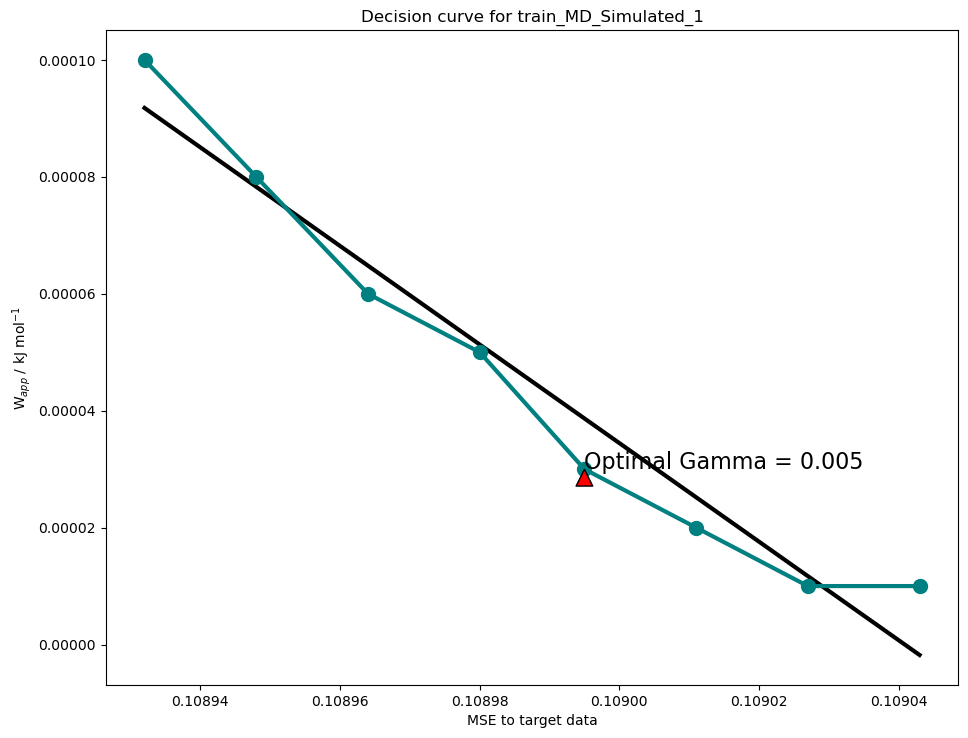

Optimal gamma for train_MD_Simulated_1 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_1/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00012  0.00072  0.00721  0.08313        0
1  0.00010  0.00062  0.00623  0.07226        1
2  0.01166  0.06781  0.50448  0.99978        2
3  0.00006  0.00038  0.00378  0.04440        3
4  0.94947  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00012  0.00072  0.00721  0.08313        0
1   0.00010  0.00062  0.00623  0.07226        1
2   0.01166  0.06781  0.50448  0.99978        2
3   0.00006  0.00038  0.00378  0.04440        3
4   0.94947  1.00000  1.00000  1.00000        4
5   0.00326  0.01935  0.17750  0.90414        5
6   0.09101  0.43527  0.99670  1.00000        6
7   0.00340  0.02019  0.18451  0.91350        7
8   1.000

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_1/val_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_1/out__val_MD_Simulated_1Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

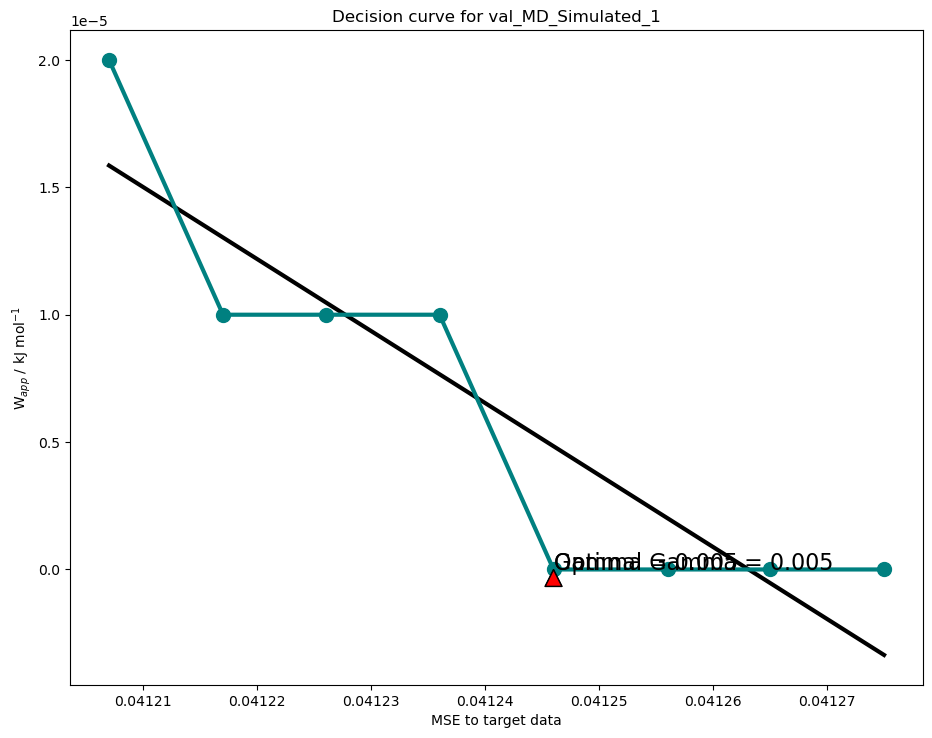

Optimal gamma for val_MD_Simulated_1 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_1/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.76251  0.99982  1.00000  1.00000        0
1  0.00037  0.00220  0.02175  0.23195        1
2  0.00246  0.01464  0.13713  0.82964        2
3  0.00810  0.04755  0.38562  0.99711        3
4  0.00267  0.01588  0.14793  0.85355        4
     0.167      1.0     10.0    120.0  peptide
0  0.76251  0.99982  1.00000  1.00000        0
1  0.00037  0.00220  0.02175  0.23195        1
2  0.00246  0.01464  0.13713  0.82964        2
3  0.00810  0.04755  0.38562  0.99711        3
4  0.00267  0.01588  0.14793  0.85355        4
5  0.00122  0.00726  0.07029  0.58299        5
6  0.22579  0.78398  1.00000  1.00000        6
7  0.16921  0.67045  0.99998  1.00000        7
     0.167      1.0    

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneD

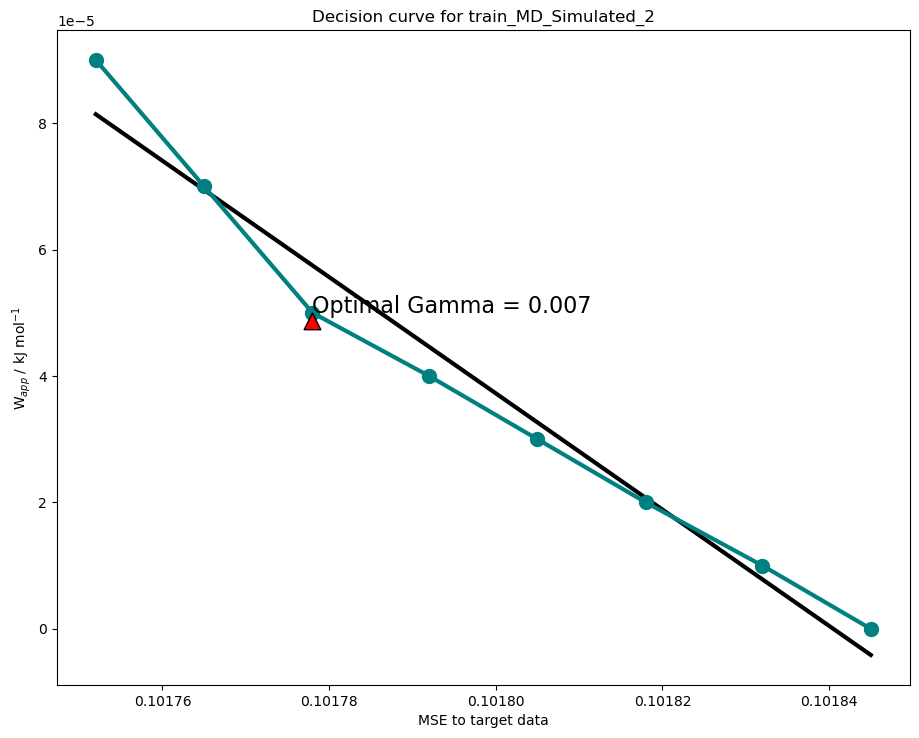

Optimal gamma for train_MD_Simulated_2 is 7x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_2/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00246  0.01464  0.13715  0.82970        0
1  0.82459  0.99997  1.00000  1.00000        1
2  0.00267  0.01589  0.14796  0.85361        2
3  0.02591  0.14545  0.79234  1.00000        3
4  0.97346  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00246  0.01464  0.13715  0.82970        0
1   0.82459  0.99997  1.00000  1.00000        1
2   0.00267  0.01589  0.14796  0.85361        2
3   0.02591  0.14545  0.79234  1.00000        3
4   0.97346  1.00000  1.00000  1.00000        4
5   0.00012  0.00072  0.00721  0.08314        5
6   0.76212  0.99982  1.00000  1.00000        6
7   1.00000  1.00000  1.00000  1.00000        7
8   0.001

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_2/val_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_2/out__val_MD_Simulated_2Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

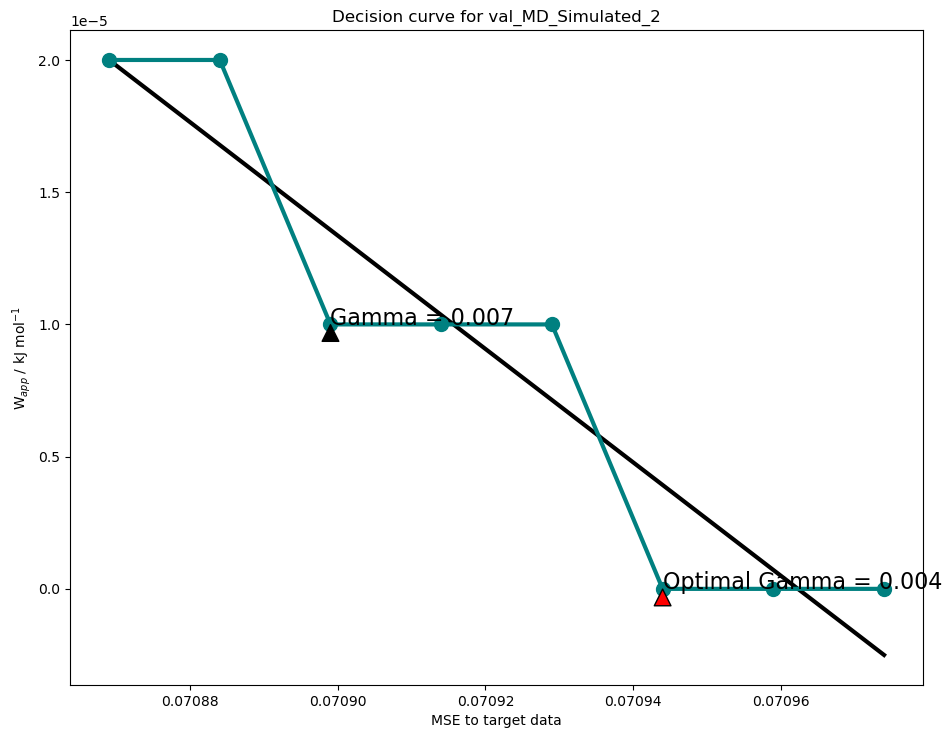

Optimal gamma for val_MD_Simulated_2 is 4x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_2/reweighting_gamma_7x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0  120.0  peptide
0  0.05048  0.26669  0.95503    1.0        0
1  0.20119  0.73948  1.00000    1.0        1
2  0.94957  1.00000  1.00000    1.0        2
3  0.87284  1.00000  1.00000    1.0        3
4  0.02368  0.13369  0.76190    1.0        4
     0.167      1.0     10.0  120.0  peptide
0  0.05048  0.26669  0.95503    1.0        0
1  0.20119  0.73948  1.00000    1.0        1
2  0.94957  1.00000  1.00000    1.0        2
3  0.87284  1.00000  1.00000    1.0        3
4  0.02368  0.13369  0.76190    1.0        4
5  0.07028  0.35360  0.98727    1.0        5
6  0.23716  0.80230  1.00000    1.0        6
7  0.81957  0.99996  1.00000    1.0        7
     0.167      1.0     10.0  120.0  peptide         

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_3/out__train_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneD

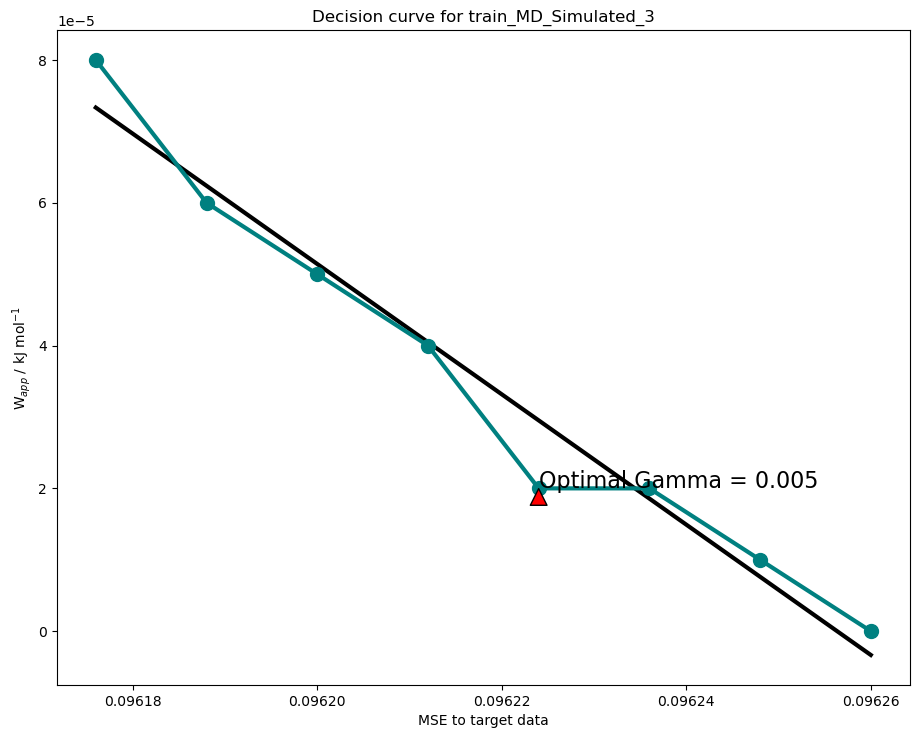

Optimal gamma for train_MD_Simulated_3 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.08825  0.42493  0.99604  1.00000        0
1  0.82466  0.99997  1.00000  1.00000        1
2  0.00001  0.00008  0.00083  0.00997        2
3  0.71978  0.99951  1.00000  1.00000        3
4  0.00472  0.02791  0.24654  0.96652        4
      0.167      1.0     10.0    120.0  peptide
0   0.08825  0.42493  0.99604  1.00000        0
1   0.82466  0.99997  1.00000  1.00000        1
2   0.00001  0.00008  0.00083  0.00997        2
3   0.71978  0.99951  1.00000  1.00000        3
4   0.00472  0.02791  0.24654  0.96652        4
5   0.00000  0.00001  0.00007  0.00085        5
6   0.87294  1.00000  1.00000  1.00000        6
7   0.22578  0.78396  1.00000  1.00000        7
8   0.008

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_3/val_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_3/out__val_MD_Simulated_3Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

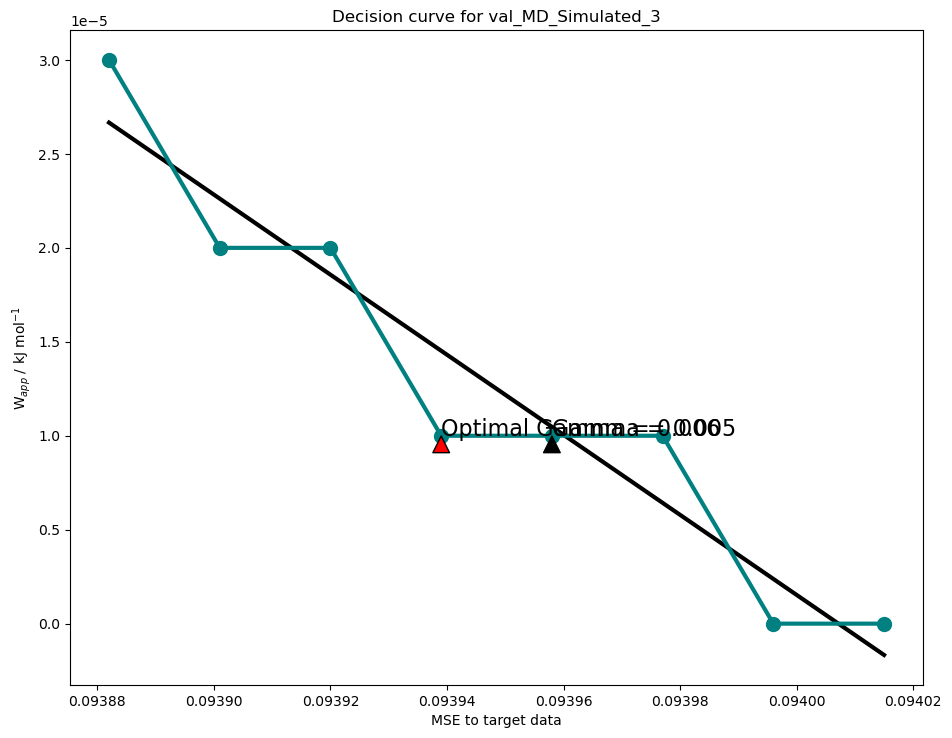

Optimal gamma for val_MD_Simulated_3 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_3/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.17069  0.67396  0.99999  1.00000        0
1  0.00267  0.01588  0.14794  0.85356        1
2  0.00122  0.00726  0.07030  0.58302        2
3  0.10261  0.47705  0.99847  1.00000        3
4  0.00164  0.00981  0.09386  0.69356        4
     0.167      1.0     10.0    120.0  peptide
0  0.17069  0.67396  0.99999  1.00000        0
1  0.00267  0.01588  0.14794  0.85356        1
2  0.00122  0.00726  0.07030  0.58302        2
3  0.10261  0.47705  0.99847  1.00000        3
4  0.00164  0.00981  0.09386  0.69356        4
5  0.00098  0.00588  0.05724  0.50703        5
6  0.16924  0.67052  0.99998  1.00000        6
7  0.00326  0.01937  0.17765  0.90435        7
     0.167      1.0    

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_4/train_MD_Simulated_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_4/out__train_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneD

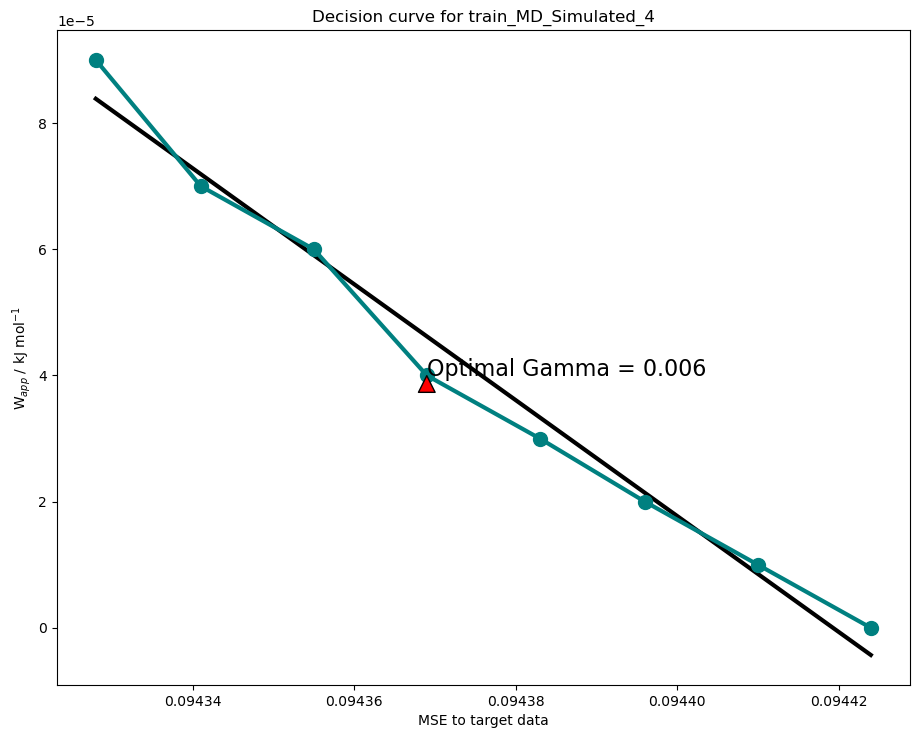

Optimal gamma for train_MD_Simulated_4 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_4/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.82465  0.99997  1.00000  1.00000        0
1  0.00010  0.00062  0.00623  0.07226        1
2  0.76225  0.99982  1.00000  1.00000        2
3  0.05058  0.26713  0.95530  1.00000        3
4  0.16912  0.67024  0.99998  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.82465  0.99997  1.00000  1.00000        0
1   0.00010  0.00062  0.00623  0.07226        1
2   0.76225  0.99982  1.00000  1.00000        2
3   0.05058  0.26713  0.95530  1.00000        3
4   0.16912  0.67024  0.99998  1.00000        4
5   0.02594  0.14561  0.79271  1.00000        5
6   0.20080  0.73873  1.00000  1.00000        6
7   0.00267  0.01589  0.14798  0.85365        7
8   0.115

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_4/val_MD_Simulated_4_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_4
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_4/out__val_MD_Simulated_4Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

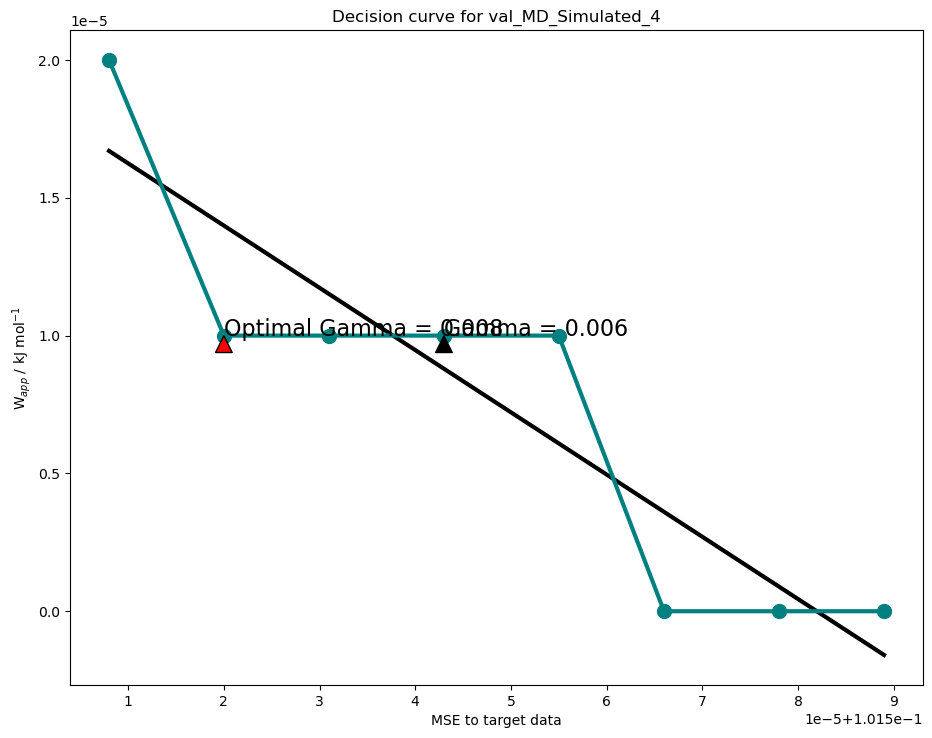

Optimal gamma for val_MD_Simulated_4 is 8x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_4/reweighting_gamma_6x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.17066  0.67388  0.99999  1.00000        0
1  0.94949  1.00000  1.00000  1.00000        1
2  0.00001  0.00008  0.00083  0.00997        2
3  0.71992  0.99951  1.00000  1.00000        3
4  0.07026  0.35352  0.98725  1.00000        4
     0.167      1.0     10.0    120.0  peptide
0  0.17066  0.67388  0.99999  1.00000        0
1  0.94949  1.00000  1.00000  1.00000        1
2  0.00001  0.00008  0.00083  0.00997        2
3  0.71992  0.99951  1.00000  1.00000        3
4  0.07026  0.35352  0.98725  1.00000        4
5  0.81957  0.99996  1.00000  1.00000        5
6  0.43345  0.96671  1.00000  1.00000        6
7  0.00164  0.00980  0.09380  0.69330        7
     0.167      1.0    

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_5/train_MD_Simulated_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_5/out__train_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneD

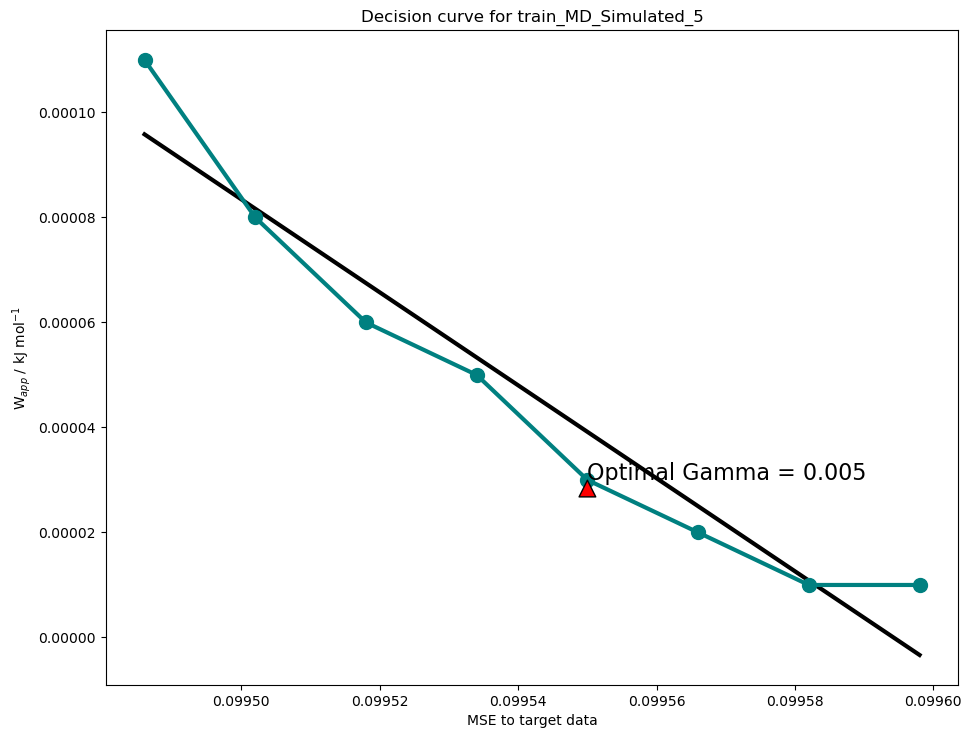

Optimal gamma for train_MD_Simulated_5 is 5x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/train_MD_Simulated_5/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(33, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.17073  0.67406  0.99999  1.00000        0
1  0.00340  0.02018  0.18445  0.91342        1
2  0.97345  1.00000  1.00000  1.00000        2
3  0.94940  1.00000  1.00000  1.00000        3
4  0.02368  0.13367  0.76187  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.17073  0.67406  0.99999  1.00000        0
1   0.00340  0.02018  0.18445  0.91342        1
2   0.97345  1.00000  1.00000  1.00000        2
3   0.94940  1.00000  1.00000  1.00000        3
4   0.02368  0.13367  0.76187  1.00000        4
5   0.00037  0.00220  0.02176  0.23199        5
6   0.20079  0.73870  1.00000  1.00000        6
7   0.00326  0.01935  0.17751  0.90416        7
8   0.762

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_5/val_MD_Simulated_5_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_5
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_5/out__val_MD_Simulated_5Intrinsic_rates.dat
Trying concurrent.futures
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX
/Users/alexi/Library/CloudStorage/OneDrive-Nexu

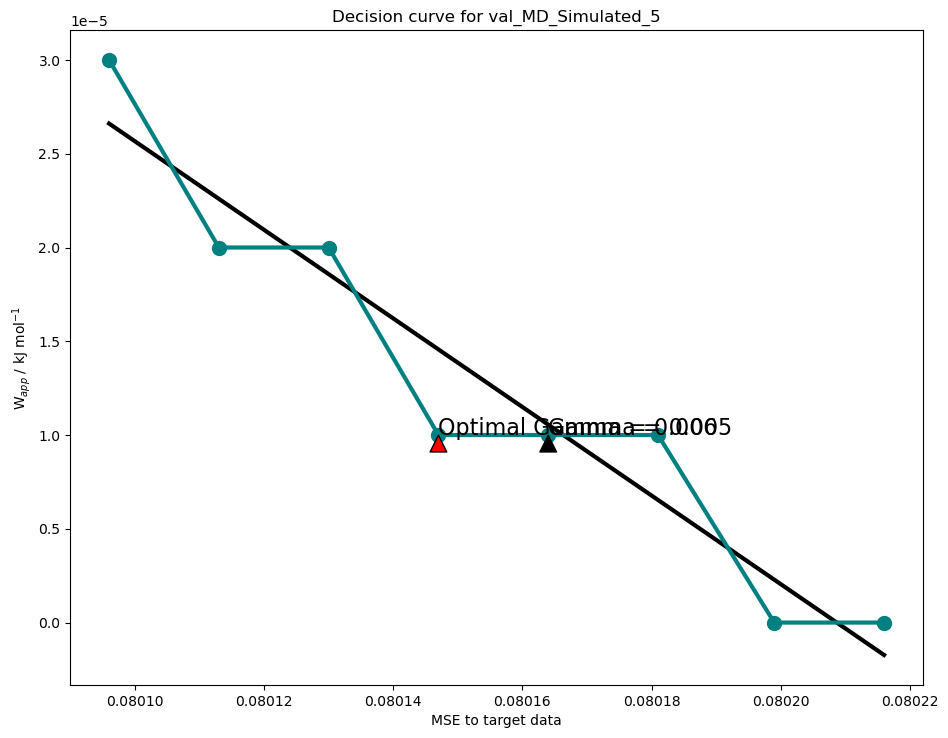

Optimal gamma for val_MD_Simulated_5 is 6x10^-3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/BPTI_500ns_0.80/val_MD_Simulated_5/reweighting_gamma_5x10^-3final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(8, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.20124  0.73958  1.00000  1.00000        0
1  0.82471  0.99997  1.00000  1.00000        1
2  0.00001  0.00008  0.00083  0.00997        2
3  0.87294  1.00000  1.00000  1.00000        3
4  0.00811  0.04758  0.38586  0.99712        4
     0.167      1.0     10.0    120.0  peptide
0  0.20124  0.73958  1.00000  1.00000        0
1  0.82471  0.99997  1.00000  1.00000        1
2  0.00001  0.00008  0.00083  0.00997        2
3  0.87294  1.00000  1.00000  1.00000        3
4  0.00811  0.04758  0.38586  0.99712        4
5  0.09103  0.43534  0.99670  1.00000        5
6  0.23706  0.80214  1.00000  1.00000        6
7  1.00000  1.00000  1.00000  1.00000        7
     0.167      1.0    

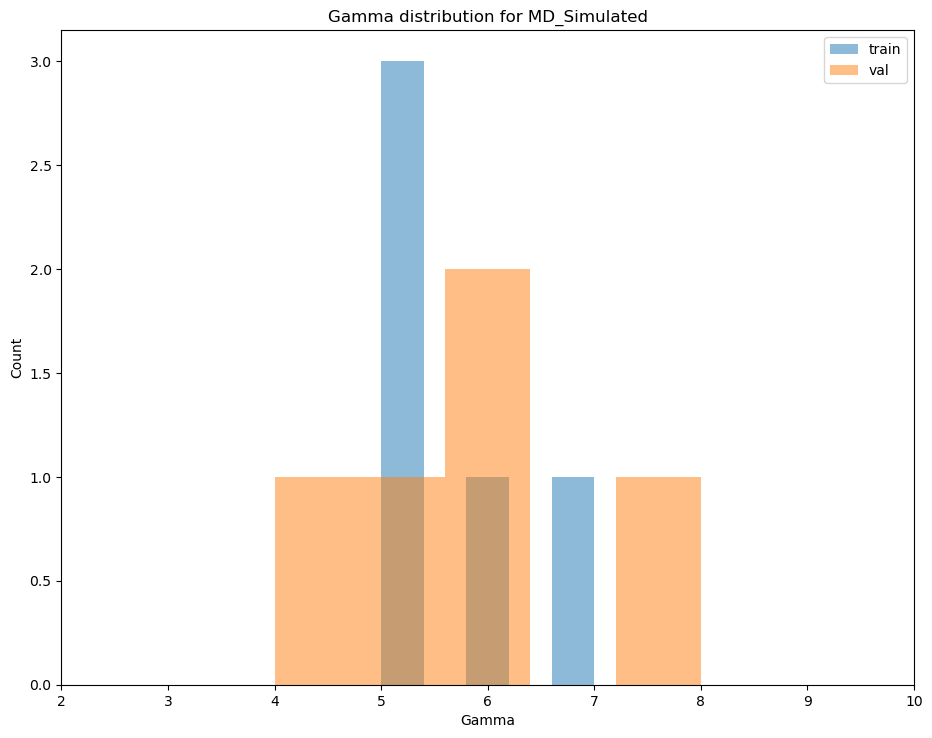

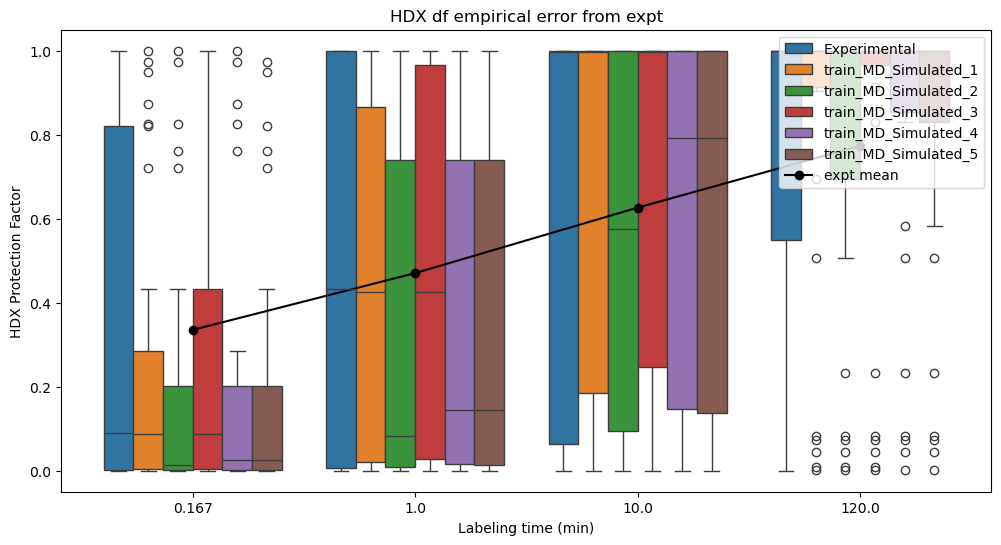

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.87294  1.00000  1.00000  1.00000        3  val_MD_Simulated_5
242  0.00811  0.04758  0.38586  0.99712        4  val_MD_Simulated_5
243  0.09103  0.43534  0.99670  1.00000        5  val_MD_Simulated_5
244  0.23706  0.80214  1.00000  1.00000        6  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000        7  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

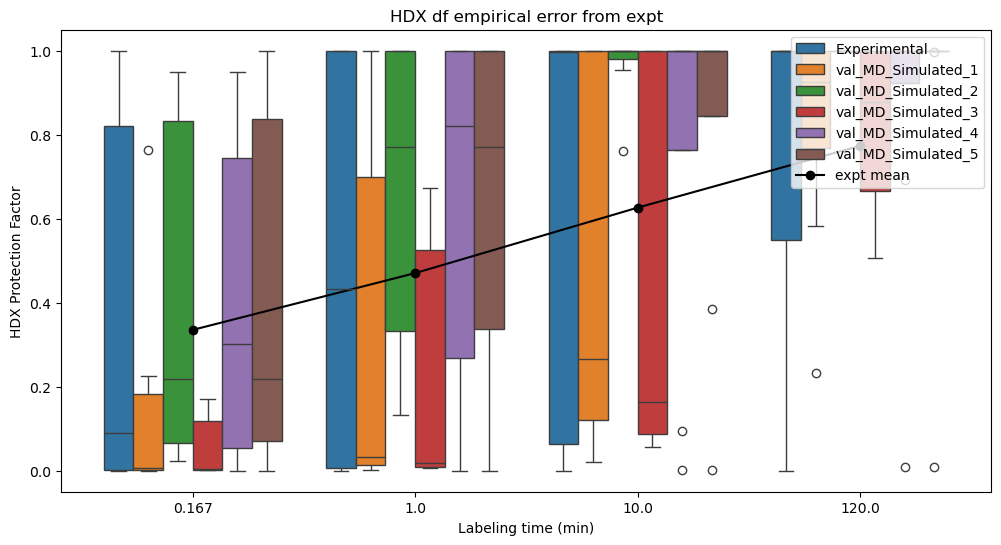

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17, 28, 2, 12, 39, 27, 36, 23, 8, 22, 25, 35, 14, 1]
val_rep_peptides [

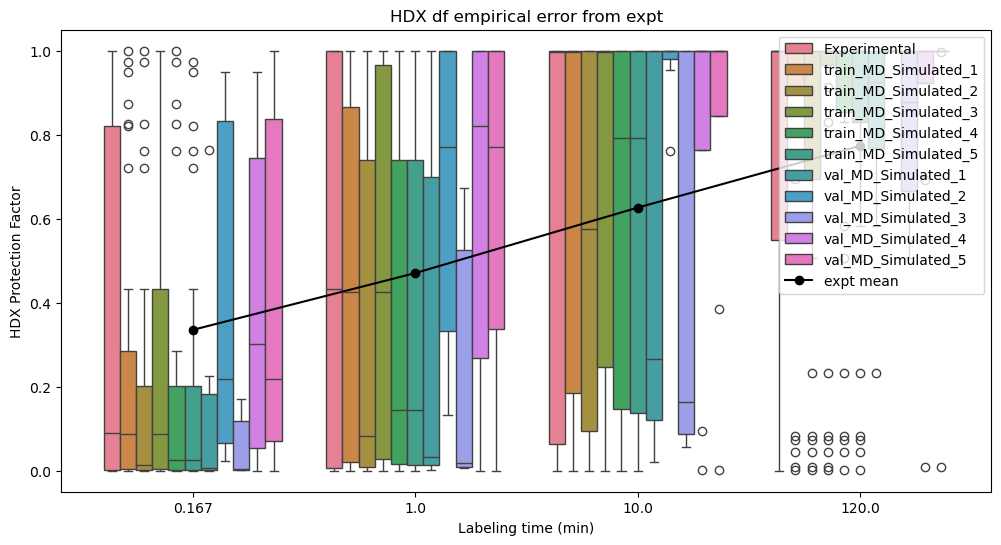

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.87294  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00811  0.04758  0.38586  0.99712       18  val_MD_Simulated_5
243  0.09103  0.43534  0.99670  1.00000       19  val_MD_Simulated_5
244  0.23706  0.80214  1.00000  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


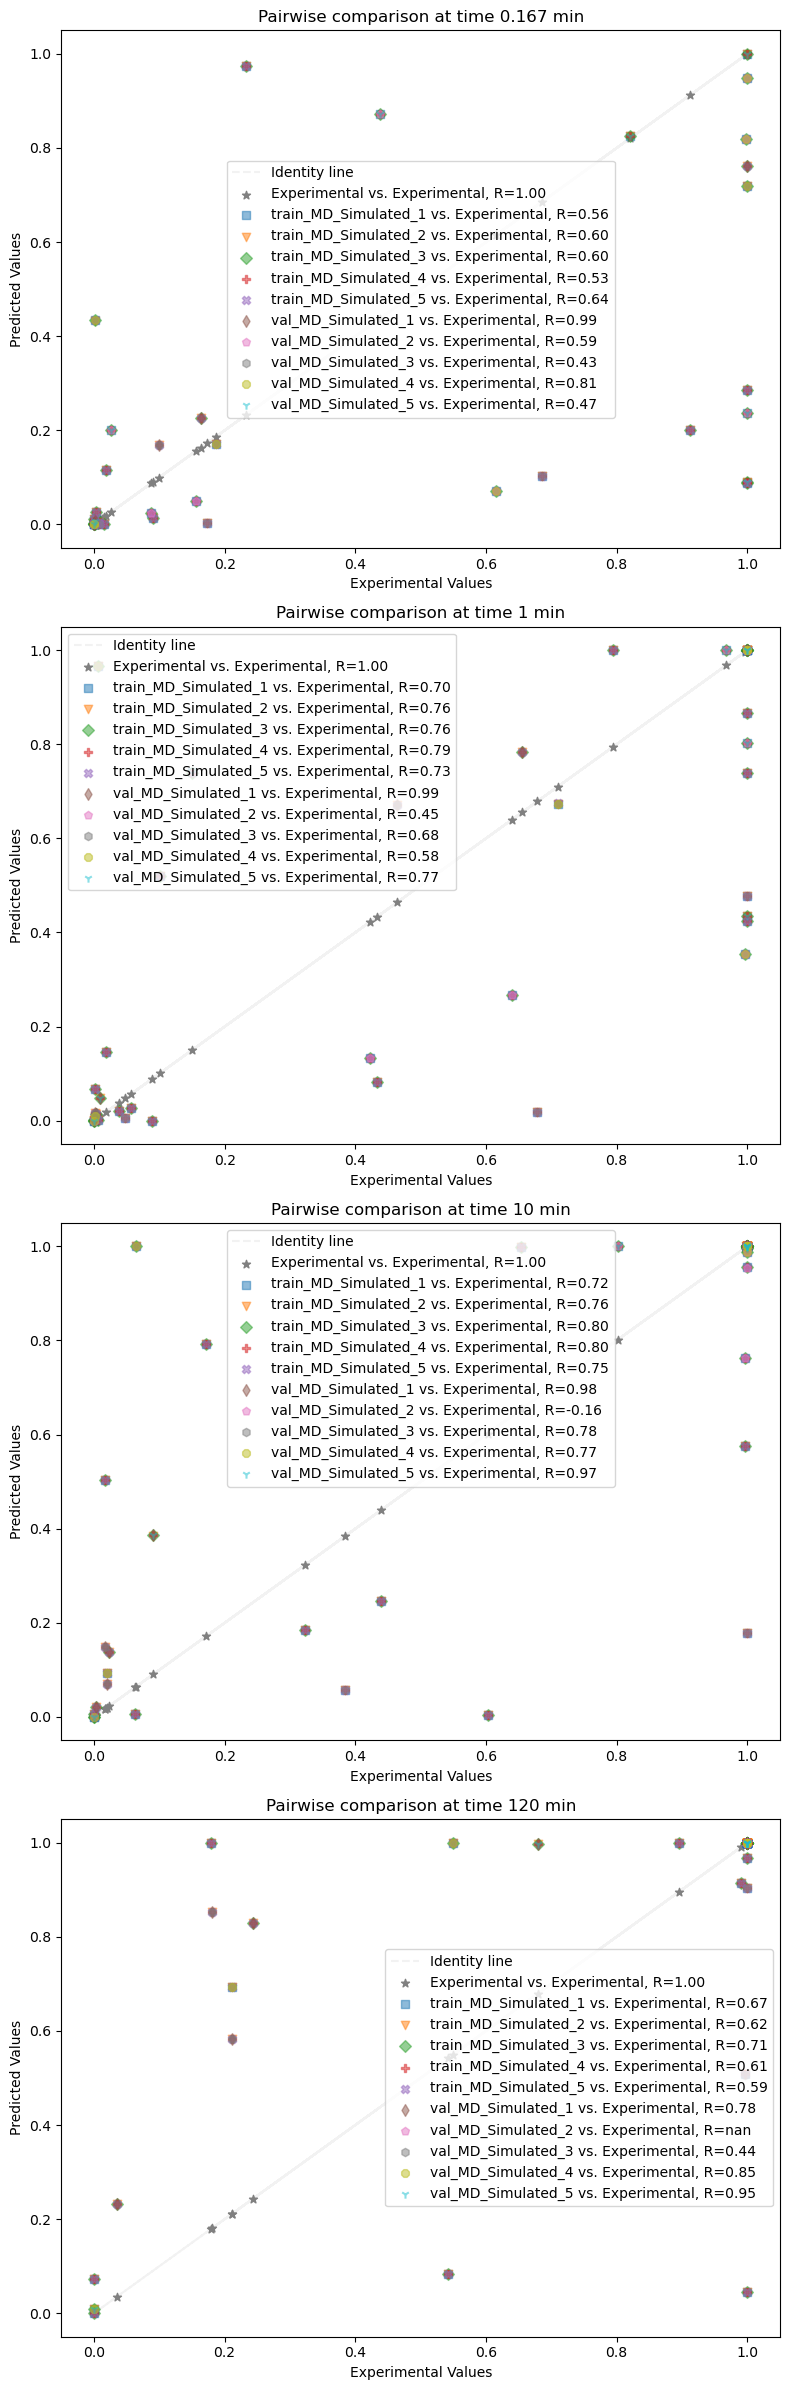

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.87294  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00811  0.04758  0.38586  0.99712       18  val_MD_Simulated_5
243  0.09103  0.43534  0.99670  1.00000       19  val_MD_Simulated_5
244  0.23706  0.80214  1.00000  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1217: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # plot as box
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1236: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the

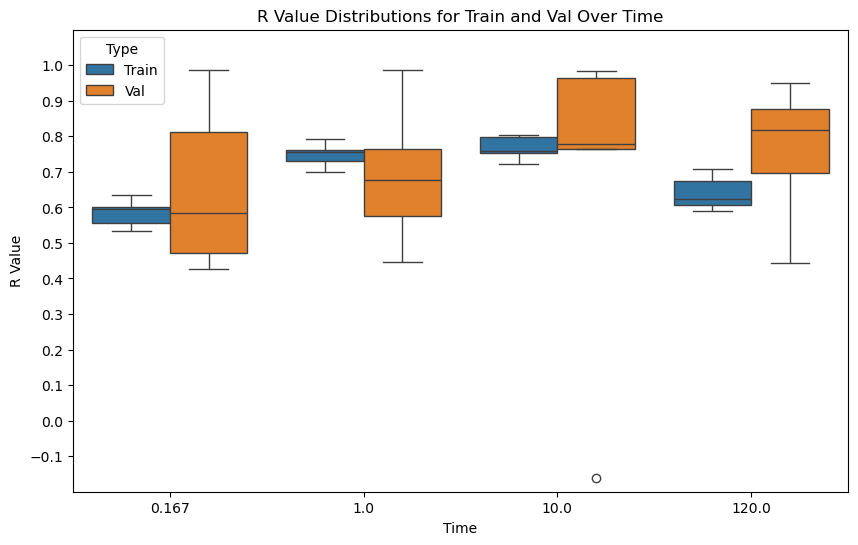

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00012  0.00072  0.00721  0.08313       24  train_MD_Simulated_1
1    0.00010  0.00062  0.00623  0.07226       13  train_MD_Simulated_1
2    0.01166  0.06781  0.50448  0.99978        8  train_MD_Simulated_1
3    0.00006  0.00038  0.00378  0.04440       25  train_MD_Simulated_1
4    0.94947  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.87294  1.00000  1.00000  1.00000       16    val_MD_Simulated_5
406  0.00811  0.04758  0.38586  0.99712       18    val_MD_Simulated_5
407  0.09103  0.43534  0.99670  1.00000       19    val_MD_Simulated_5
408  0.23706  0.80214  1.00000  1.00000       27    val_MD_Simulated_5
409  1.00000  1.00000  1.00000  1.00000       29    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00012  0.00072  0.0072

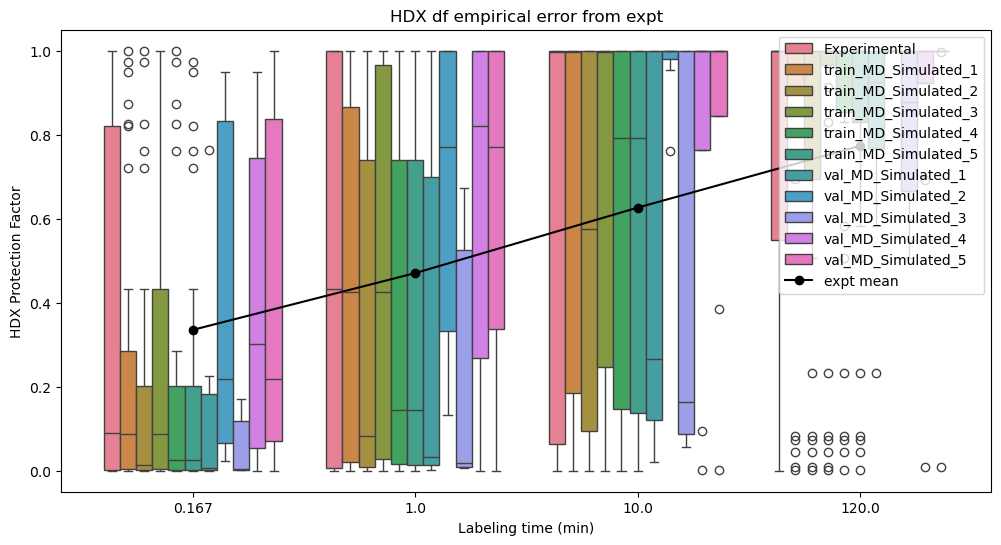

plot_dfracs_compare


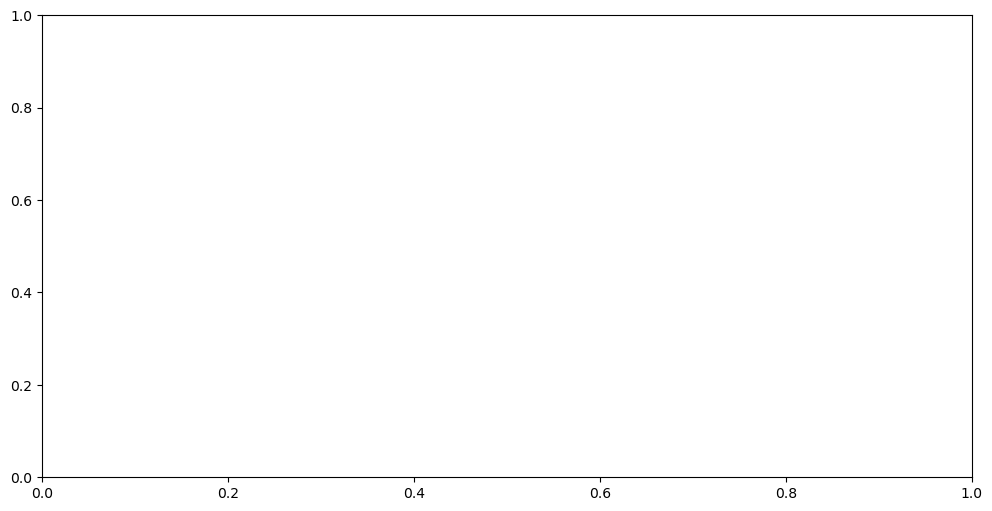

In [ ]:
# train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [ ]:
# VDX.save_experiment()

# dump = train_dfs, val_dfs, train_gammas, val_gammas

# import pickle
# with open(f'dump_{VDX.name}.pickle', 'wb') as f:
#     print(f"Saving pickle", f'dump_{VDX.name}.pickle')
#     pickle.dump(dump, f)

Saving experiment to:  logs/BPTI_500ns_0.80_1705419566.pkl
Saving pickle dump_BPTI_500ns_0.80.pickle


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:299: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [ ]:
VDX = VDX.load_experiment(load_path='logs/BPTI_500ns_0.80_1705419566.pkl')

Attempting to load experiment from:  logs/BPTI_500ns_0.80_1705419566.pkl
Loading experiment from:  logs/BPTI_500ns_0.80_1705419566.pkl


In [ ]:
# break

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.87294  1.00000  1.00000  1.00000        3  val_MD_Simulated_5
242  0.00811  0.04758  0.38586  0.99712        4  val_MD_Simulated_5
243  0.09103  0.43534  0.99670  1.00000        5  val_MD_Simulated_5
244  0.23706  0.80214  1.00000  1.00000        6  val_MD_S

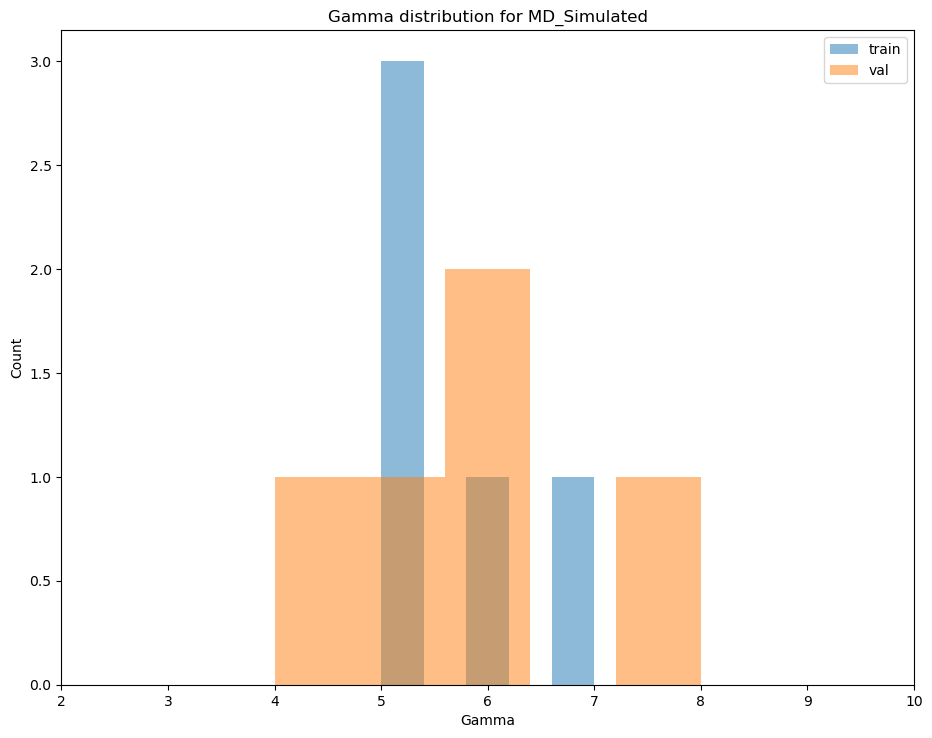

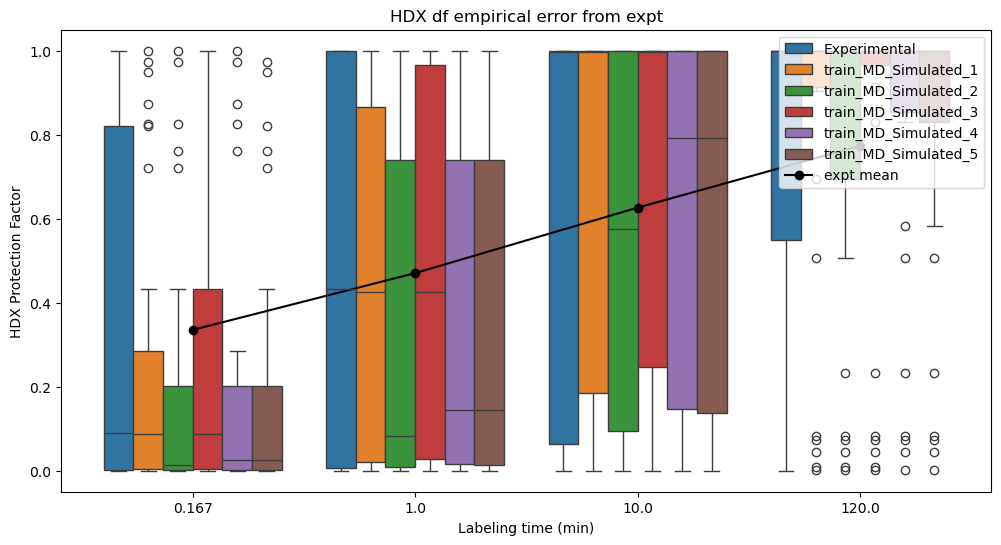

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.87294  1.00000  1.00000  1.00000        3  val_MD_Simulated_5
242  0.00811  0.04758  0.38586  0.99712        4  val_MD_Simulated_5
243  0.09103  0.43534  0.99670  1.00000        5  val_MD_Simulated_5
244  0.23706  0.80214  1.00000  1.00000        6  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000        7  val_MD_Simulated_5

[246 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

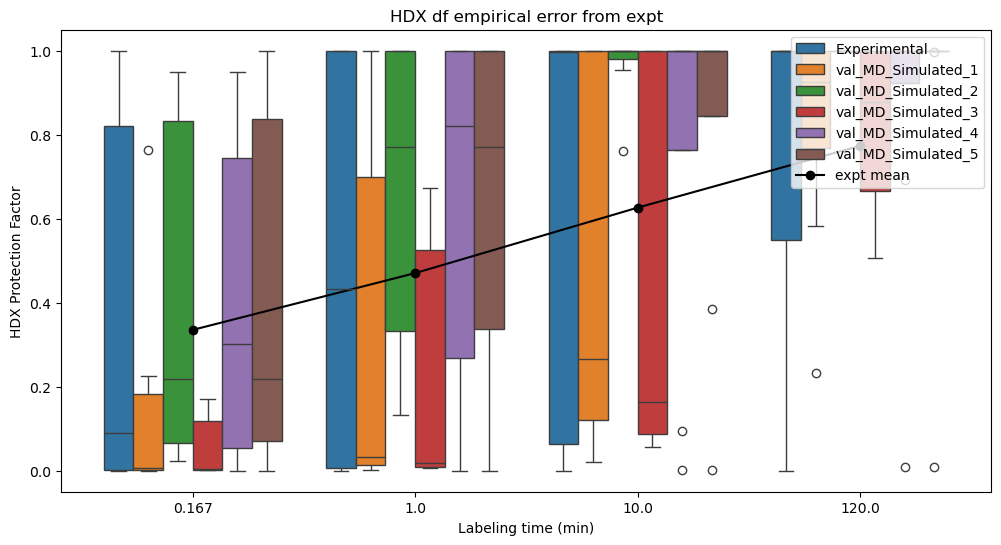

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3', 'train_MD_Simulated_4', 'train_MD_Simulated_5']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3', 'val_MD_Simulated_4', 'val_MD_Simulated_5']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]
train_rep_peptides [5, 13, 7, 0, 38, 26, 9, 20, 37, 40, 18, 19, 10, 24, 33, 16, 29, 34, 6, 17, 28, 2, 12, 39, 27, 36, 23, 8, 22, 25, 35, 14, 1]
val_rep_peptides [

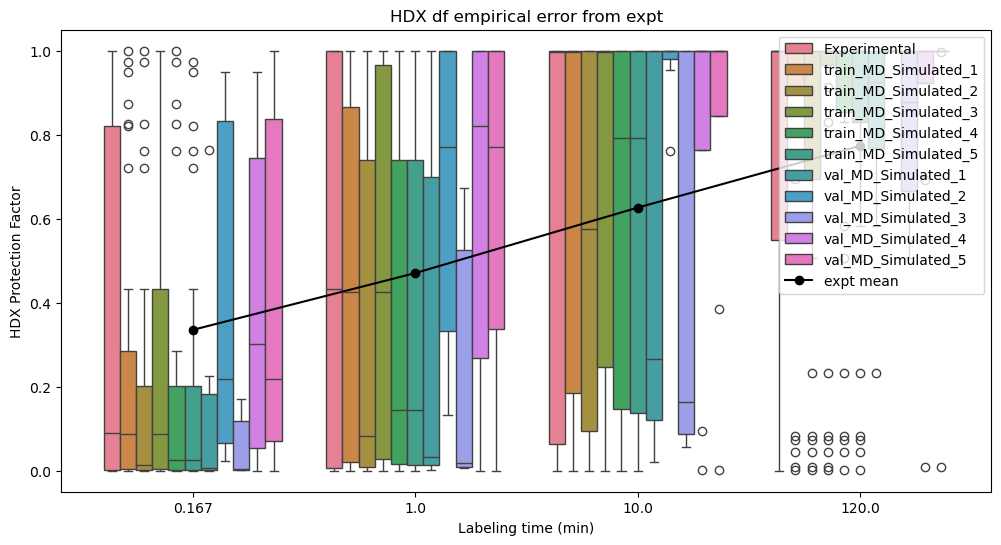

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.87294  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00811  0.04758  0.38586  0.99712       18  val_MD_Simulated_5
243  0.09103  0.43534  0.99670  1.00000       19  val_MD_Simulated_5
244  0.23706  0.80214  1.00000  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


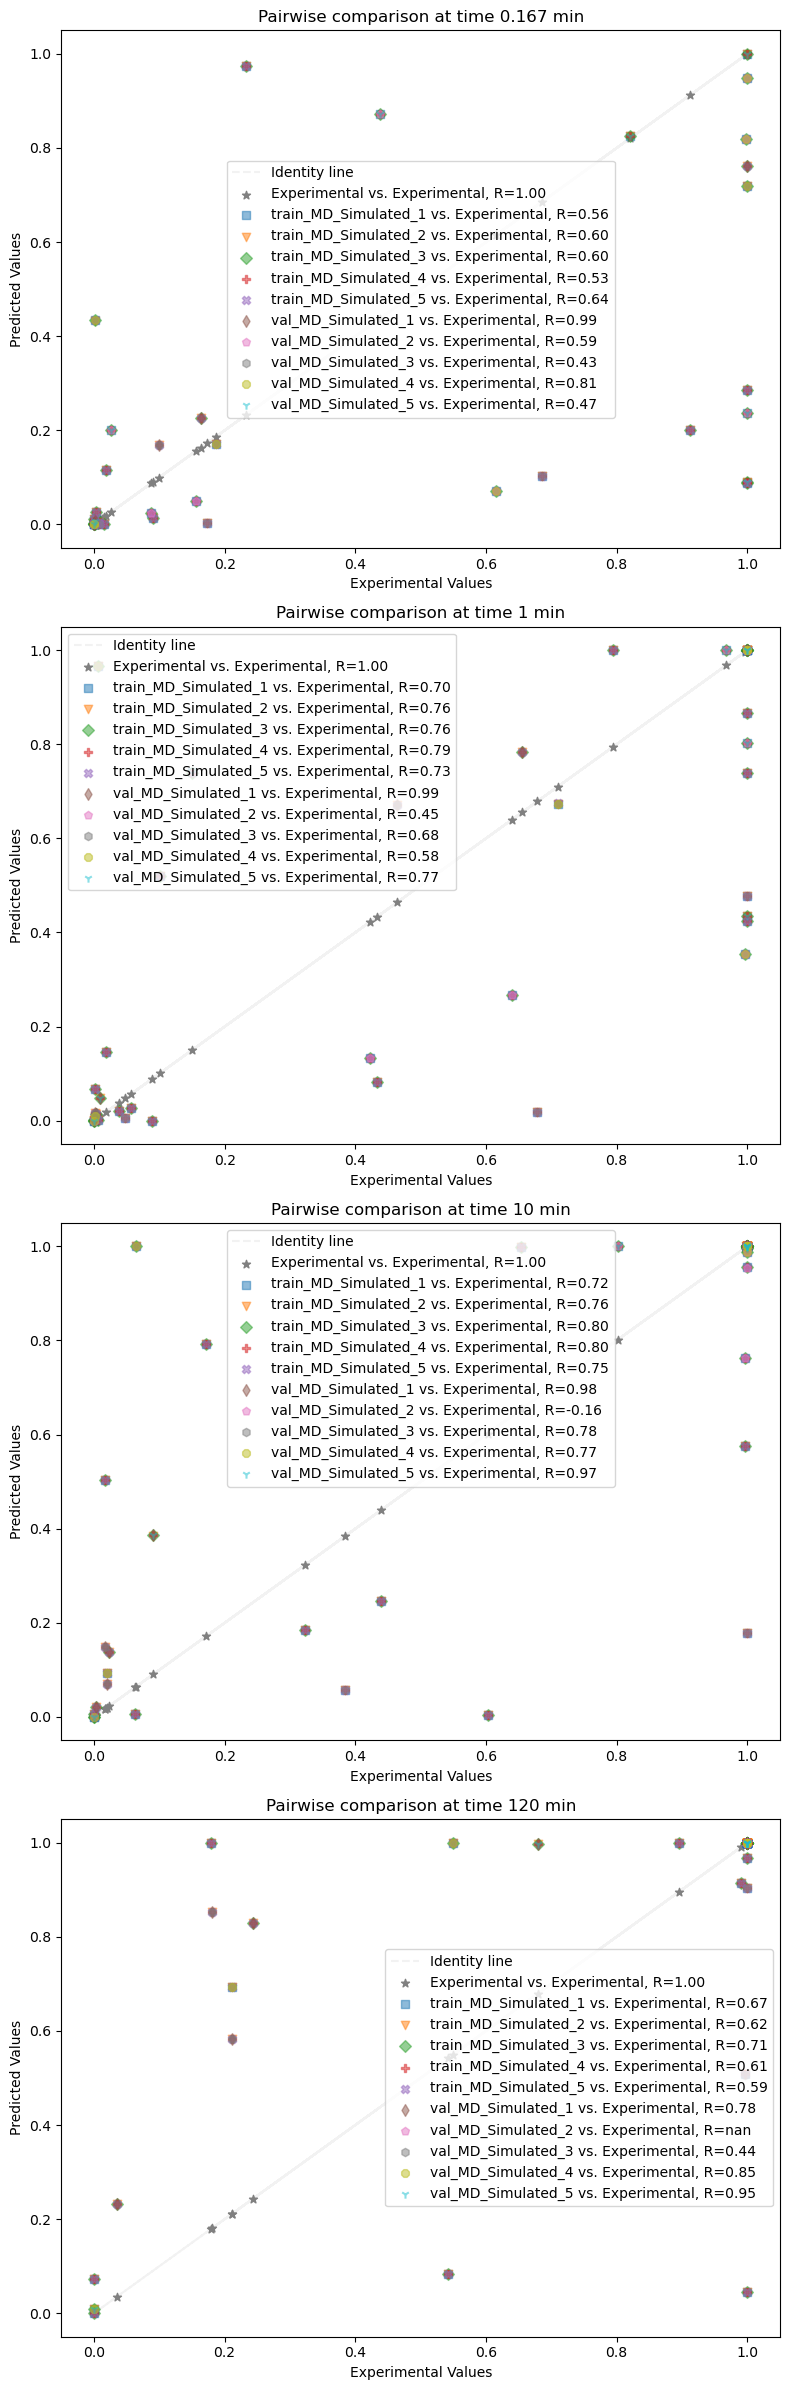

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
241  0.87294  1.00000  1.00000  1.00000       16  val_MD_Simulated_5
242  0.00811  0.04758  0.38586  0.99712       18  val_MD_Simulated_5
243  0.09103  0.43534  0.99670  1.00000       19  val_MD_Simulated_5
244  0.23706  0.80214  1.00000  1.00000       27  val_MD_Simulated_5
245  1.00000  1.00000  1.00000  1.00000       29  val_MD_Simulated_5

[246 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1217: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # plot as box
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1236: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the

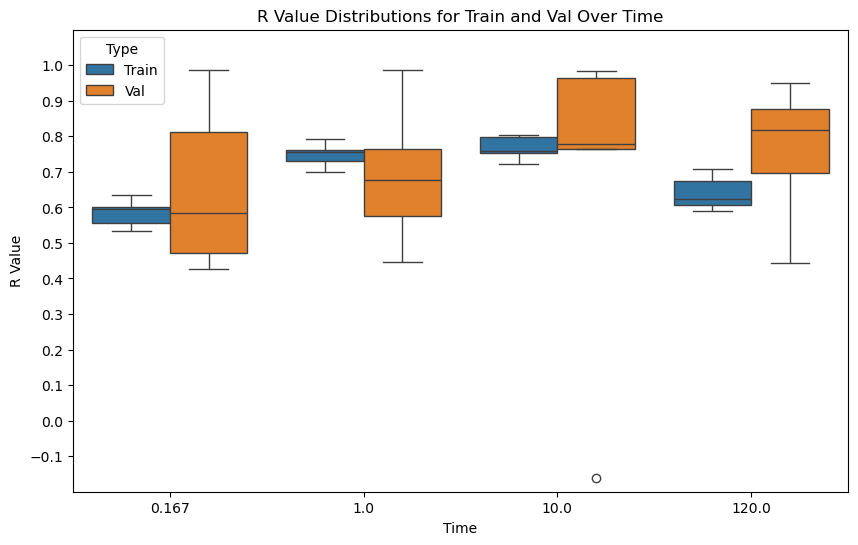

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00012  0.00072  0.00721  0.08313       24  train_MD_Simulated_1
1    0.00010  0.00062  0.00623  0.07226       13  train_MD_Simulated_1
2    0.01166  0.06781  0.50448  0.99978        8  train_MD_Simulated_1
3    0.00006  0.00038  0.00378  0.04440       25  train_MD_Simulated_1
4    0.94947  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
405  0.87294  1.00000  1.00000  1.00000       16    val_MD_Simulated_5
406  0.00811  0.04758  0.38586  0.99712       18    val_MD_Simulated_5
407  0.09103  0.43534  0.99670  1.00000       19    val_MD_Simulated_5
408  0.23706  0.80214  1.00000  1.00000       27    val_MD_Simulated_5
409  1.00000  1.00000  1.00000  1.00000       29    val_MD_Simulated_5

[410 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00012  0.00072  0.0072

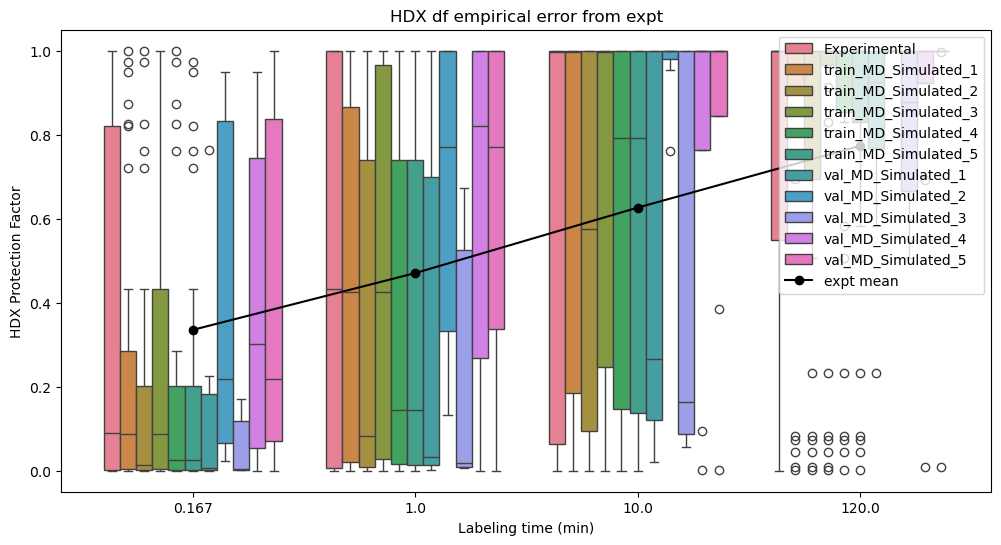

plot_dfracs_compare


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

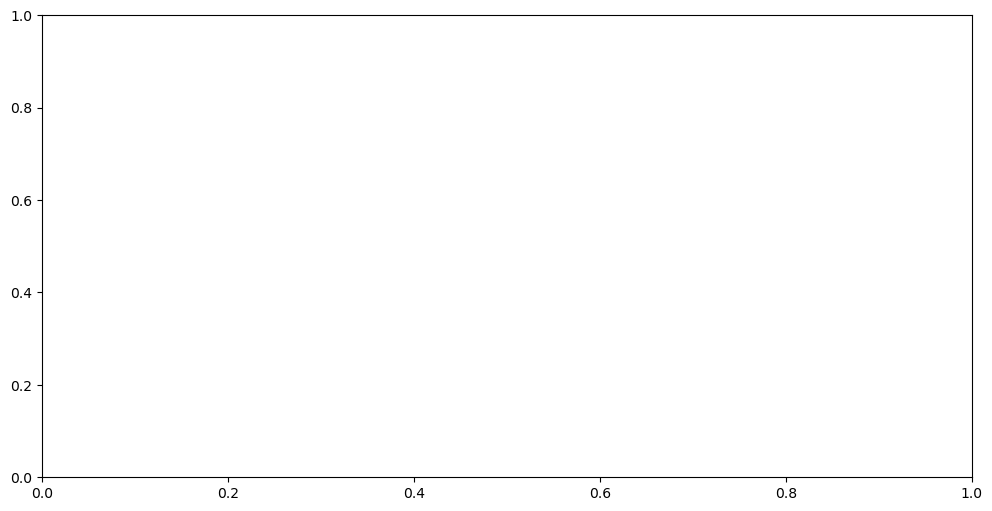

In [ ]:
with open('dump_BPTI_500ns_0.80.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )